In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scstats

In [2]:
df = pd.read_csv('epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


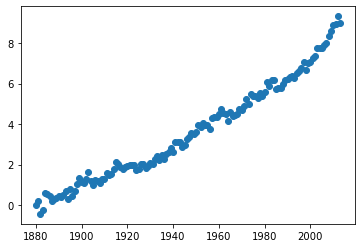

In [3]:
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

In [4]:
df.set_index('Year', inplace=True)
df = df.loc[2000:]


df['yrs_since_incep'] = df.index - 2000

scstats.linregress(df['yrs_since_incep'], df['CSIRO Adjusted Sea Level'])


LinregressResult(slope=0.1664272733318682, intercept=7.0610798577714275, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=0.08147927071912064)

In [5]:
years = []
for i in range(51):
    years.append(2000 + i)

regression = []

for i in years:
    regression.append(0.1664272733318682 * (i-2000) + 7.0610798577714275)
    
combined = pd.Series(data=regression, index=years)
combined = combined.loc[2000:]
#combined

Text(0.5, 1.0, 'Rise in Sea Level')

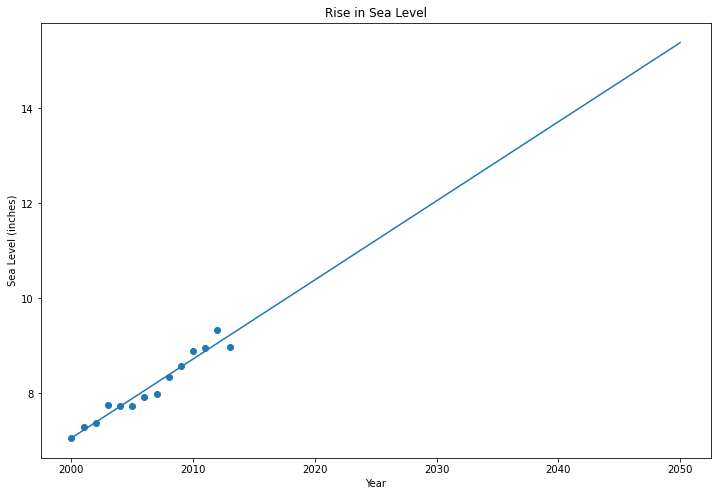

In [6]:
plt.figure(figsize=(12, 8))

plt.scatter(df.index, df['CSIRO Adjusted Sea Level'])
plt.plot(combined.index, combined)
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

In [7]:
combined[2050]

15.382443524364838

<AxesSubplot:xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

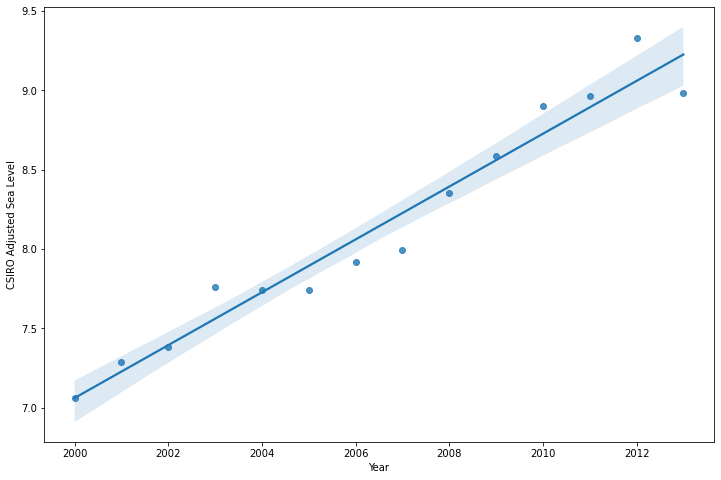

In [8]:
#EXPERIMENTAL USING REGPLOT
plt.figure(figsize=(12, 8))
sns.regplot(x=df.index, y=df['CSIRO Adjusted Sea Level'], data=df)